<a href="https://colab.research.google.com/github/soham-madrewar/FODIP-Assignment-/blob/main/fdip5_055.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -q opencv-python-headless matplotlib scikit-image

import io, os
from google.colab import files
from pathlib import Path
import numpy as np
import cv2
import matplotlib.pyplot as plt
from skimage import exposure, img_as_ubyte


In [ ]:
OUT_DIR = "/content/outputs"
os.makedirs(OUT_DIR, exist_ok=True)

print("Upload one or more image files (jpg/png). Use the upload dialog when it appears.")
uploaded = files.upload()
if not uploaded:
    raise RuntimeError("No files uploaded. Re-run the cell and upload images.")

def to_gray(img_bgr):
    if img_bgr is None:
        return None
    if img_bgr.ndim == 2:
        return img_bgr
    return cv2.cvtColor(img_bgr, cv2.COLOR_BGR2GRAY)


Upload one or more image files (jpg/png). Use the upload dialog when it appears.


Saving lion.jpg to lion.jpg


In [ ]:
def contrast_stretch(img, p_low=1, p_high=99):
    """
    Contrast stretching with percentile clipping.
    p_low/p_high are percentiles for input clipping (0-100).
    """
    # compute low/high by percentiles
    low, high = np.percentile(img, (p_low, p_high))
    # clip then scale to 0..255
    stretched = np.clip((img - low) * 255.0 / (high - low + 1e-8), 0, 255).astype(np.uint8)
    return stretched

In [ ]:
def hist_equalize(img):
    """
    Global histogram equalization (grayscale).
    """
    return cv2.equalizeHist(img)


In [ ]:
def plot_images_and_hists(original, stretched, equalized, title_base, save_prefix):
    variants = [("Original", original), ("Contrast Stretched", stretched), ("Histogram Equalized", equalized)]
    n = len(variants)
    fig, axes = plt.subplots(n, 2, figsize=(10, 4*n))
    for i, (name, img) in enumerate(variants):
        ax_img = axes[i,0]
        ax_hist = axes[i,1]
        ax_img.imshow(img, cmap='gray', vmin=0, vmax=255)
        ax_img.axis('off')
        ax_img.set_title(name)
        ax_hist.hist(img.ravel(), bins=256, range=(0,255))
        ax_hist.set_xlim(0,255)
        ax_hist.set_ylabel("Count")
    plt.suptitle(title_base, fontsize=14)
    plt.tight_layout(rect=[0,0,1,0.96])
    fig_path = f"{save_prefix}_comparison.png"
    fig.savefig(fig_path, dpi=150)
    plt.show()
    plt.close(fig)
    # Save images
    cv2.imwrite(f"{save_prefix}_original.png", original)
    cv2.imwrite(f"{save_prefix}_stretched.png", stretched)
    cv2.imwrite(f"{save_prefix}_equalized.png", equalized)
    return fig_path

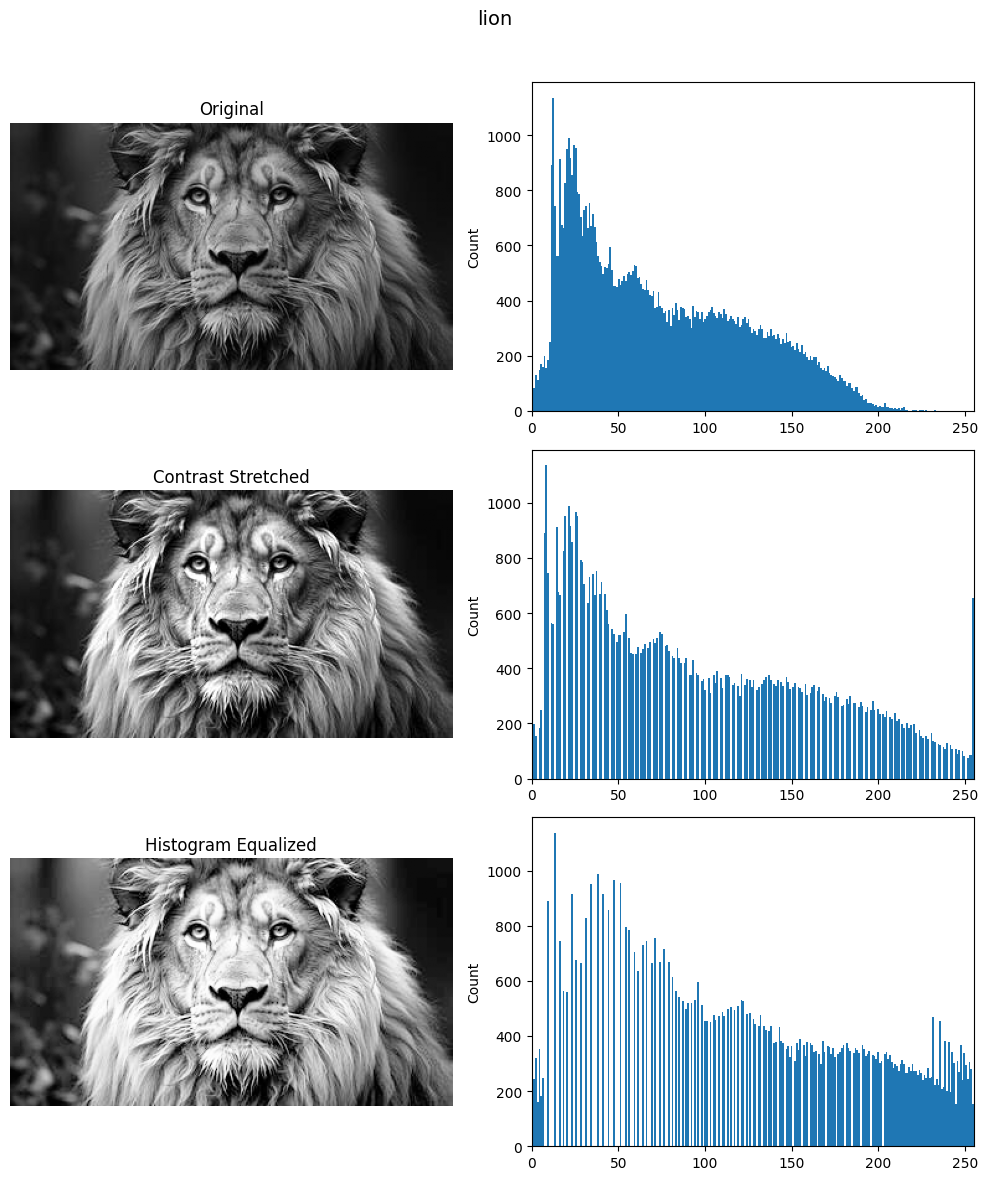

Saved outputs for 'lion.jpg' into /content/outputs:
 - lion_original.png, lion_stretched.png, lion_equalized.png
 - lion_comparison.png (comparison figure)

Done. Check /content/outputs for images and comparison figures.


In [ ]:
for fname, b in uploaded.items():
    base = Path(fname).stem
    # decode image bytes (preserve color; later convert to gray)
    file_bytes = io.BytesIO(b).getvalue()
    arr = np.frombuffer(file_bytes, dtype=np.uint8)
    img_bgr = cv2.imdecode(arr, cv2.IMREAD_COLOR)
    if img_bgr is None:
        print(f"Skipping (cannot decode): {fname}")
        continue
    gray = to_gray(img_bgr)
    # Ensure dtype uint8
    if gray.dtype != np.uint8:
        gray = img_as_ubyte(gray)
    # 1) Contrast stretching (percentile clipping 1-99 by default)
    stretched = contrast_stretch(gray, p_low=1, p_high=99)
    # 2) Histogram equalization (global)
    equalized = hist_equalize(gray)
    # 3) Save and plot
    prefix = os.path.join(OUT_DIR, base)
    figpath = plot_images_and_hists(gray, stretched, equalized, title_base=base, save_prefix=prefix)
    print(f"Saved outputs for '{fname}' into {OUT_DIR}:")
    print(f" - {base}_original.png, {base}_stretched.png, {base}_equalized.png")
    print(f" - {Path(figpath).name} (comparison figure)")

print("\nDone. Check /content/outputs for images and comparison figures.")